# Choosing the snapshot interval

In [1]:
import importlib

from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from modules import stats
importlib.reload(stats)


<module 'modules.stats' from '/srv/ccrc/AtmSS/z5310829/honours_project/modules/stats.py'>

In [2]:
client = Client(n_workers=4, threads_per_worker=1, memory_limit='8GB')
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 29.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34865,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 29.80 GiB
Comm: tcp://127.0.0.1:42901,Total threads: 1
Dashboard: http://127.0.0.1:39025/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:36785,


In [33]:
base_path = '/srv/ccrc/AtmSS/z5310829/honours_project/'
fig_path = base_path + 'figures/thesis/07_appendix/'
data_path = base_path + 'final_data/resolution_tests/1024x128/'

SPIN_UP_TIME = 700.


In [27]:
data = xr.open_mfdataset(
    data_path + '*.nc', chunks={'x': -1, 'z': -1, 't': 100},
)
data = data.isel(t=(data.t >= SPIN_UP_TIME))
data.theta


<xarray.DataArray 'theta' (t: 1500, x: 1024, z: 128)>
dask.array<getitem, shape=(1500, 1024, 128), dtype=float64, chunksize=(100, 1024, 128), chunktype=numpy.ndarray>
Coordinates:
    sim_time      (t) float64 dask.array<chunksize=(99,), meta=np.ndarray>
    wall_time     (t) float64 dask.array<chunksize=(99,), meta=np.ndarray>
    timestep      (t) float64 dask.array<chunksize=(99,), meta=np.ndarray>
    iteration     (t) int64 dask.array<chunksize=(99,), meta=np.ndarray>
    write_number  (t) int64 dask.array<chunksize=(99,), meta=np.ndarray>
  * x             (x) float64 0.0 0.007812 0.01562 0.02344 ... 7.977 7.984 7.992
  * z             (z) float64 3.765e-05 0.0003388 0.0009409 ... 0.9997 1.0
  * t             (t) float64 700.2 700.4 700.6 700.8 ... 999.6 999.8 1e+03

In [30]:
max_lag = 10.
lag_step = 0.2
u_corr = stats.time_autocorrelation(data.u, max_lag, lag_step).compute()
w_corr = stats.time_autocorrelation(data.w, max_lag, lag_step).compute()
theta_corr = stats.time_autocorrelation(
    data.theta, max_lag, lag_step).compute()


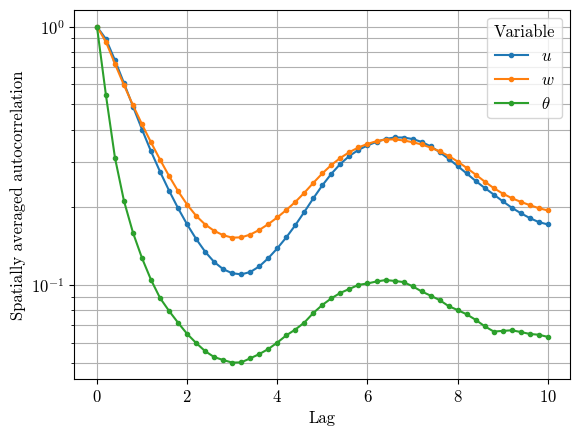

In [34]:
fig, ax = plt.subplots()
corr = zip([u_corr, w_corr, theta_corr], ['$u$', '$w$', '$\\theta$'])
for array, label in corr:
    ax.semilogy(array.t_lag, array, label=label, marker='.')

ax.legend(title='Variable')
ax.grid(True, which='both')
ax.set(xlabel='Lag', ylabel='Spatially averaged autocorrelation')
fig.savefig(fig_path + 'autocorrelation.pdf')


In [3]:
client.close()
